<a href="https://colab.research.google.com/github/Thevaibhavraina/DATA-ANALYSIS/blob/main/titanic_survival_compitition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Vaibhav Raina

Roll no- 2018110040

Lab- Data Analytics batch A

Topic- Titanic Survival Compitition

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [312]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
from category_encoders import OneHotEncoder

In [314]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [315]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [316]:
df.drop(columns ="Ticket", inplace=True)

In [317]:
df_test.drop(columns ="Ticket", inplace=True)

In [318]:
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) 

In [319]:
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0]) 

In [320]:
df["Age"] = df["Age"].groupby([df["Pclass"], df["Sex"]]).apply(lambda x: x.fillna(x.mean()))

In [321]:
df_test["Age"] = df_test["Age"].groupby([df_test["Pclass"], df_test["Sex"]]).apply(lambda x: x.fillna(x.mean()))

In [322]:
df.drop(columns = "Fare", inplace = True)

In [323]:
df_test.drop(columns = "Fare", inplace = True)

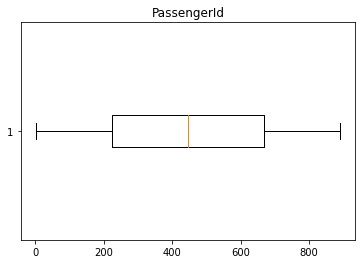

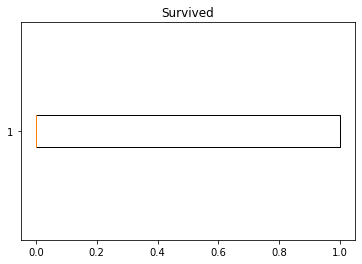

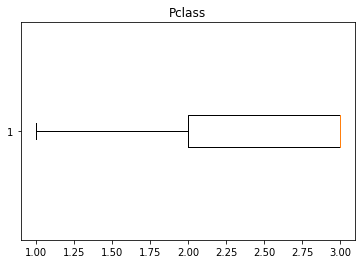

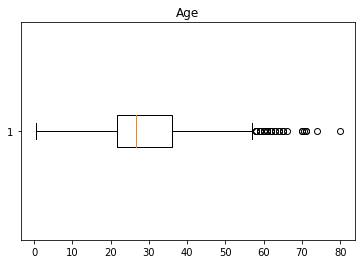

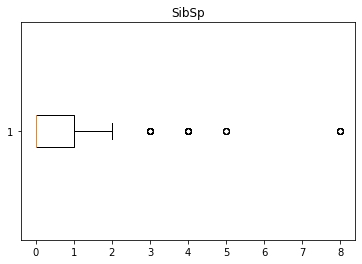

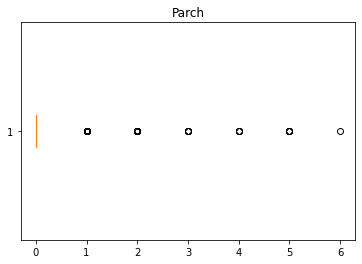

In [324]:
for i in df.select_dtypes("number").columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.boxplot(df[i], vert=False);

In [325]:
df.drop(columns = "PassengerId", inplace = True)
df.shape

(891, 9)

In [326]:
df_test.drop(columns = "PassengerId", inplace = True)
df_test.shape

(418, 8)

In [327]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    low = Q1 - 1.5 * IQR
    top = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < low ) |  (df[ft]  > top) ]
    return ls

In [328]:
index_list = []
for i in ["Pclass", "Age","SibSp", "Parch"]:
    index_list.extend(outliers(df, i))

In [329]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [330]:
df_new = remove(df, index_list)

In [331]:
df_new.shape

(650, 9)

In [332]:
majority_class, minority_class = round(df["Survived"].value_counts(normalize = True),2)
print(majority_class, minority_class)

0.62 0.38


In [333]:
target = "Survived"
X= df_new.drop(columns = target)
y = df_new[target]

In [334]:
X_train, x_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 42)

In [335]:
#logistic regression

In [336]:
from sklearn.pipeline import Pipeline, make_pipeline

In [337]:
class1 = make_pipeline(OneHotEncoder(use_cat_names = True),LogisticRegression())
class1.fit(X_train, y_train)
y_pred1 = class1.predict(x_test)
print(classification_report(y_test, y_pred1))
accuracy_score(y_pred1, y_test)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        81
           1       0.75      0.67      0.71        49

    accuracy                           0.79       130
   macro avg       0.78      0.77      0.77       130
weighted avg       0.79      0.79      0.79       130



0.7923076923076923

In [338]:
#SVM 

In [339]:
from sklearn.svm import SVC
class2 = make_pipeline(OneHotEncoder(use_cat_names = True),SVC(kernel = 'rbf', random_state=1))
class2.fit(X_train, y_train)
y_pred2 = class2.predict(x_test)
print(classification_report(y_test, y_pred2))
accuracy_score(y_pred2, y_test)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        81
           1       0.00      0.00      0.00        49

    accuracy                           0.62       130
   macro avg       0.31      0.50      0.38       130
weighted avg       0.39      0.62      0.48       130



0.6230769230769231

In [340]:
#KNN

In [341]:
class3 = make_pipeline(OneHotEncoder(use_cat_names = True),KNeighborsClassifier(n_neighbors=5))
class3.fit(X_train, y_train)
y_pred3 = class3.predict(x_test)
print(classification_report(y_test, y_pred3))
accuracy_score(y_pred3, y_test)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        81
           1       0.72      0.53      0.61        49

    accuracy                           0.75       130
   macro avg       0.74      0.70      0.71       130
weighted avg       0.74      0.75      0.74       130



0.7461538461538462

In [342]:
#DecisionTree

In [343]:
from sklearn.tree import DecisionTreeClassifier
class4 = make_pipeline(OneHotEncoder(use_cat_names = True),DecisionTreeClassifier(max_depth=10, random_state=1))
class4.fit(X_train, y_train)
y_pred4 = class4.predict(x_test)
print(classification_report(y_test, y_pred4))
accuracy_score(y_pred4, y_test)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        81
           1       0.71      0.59      0.64        49

    accuracy                           0.75       130
   macro avg       0.74      0.72      0.73       130
weighted avg       0.75      0.75      0.75       130



0.7538461538461538

In [344]:
#RandomForest

In [345]:
from sklearn.ensemble import RandomForestClassifier
class5 = make_pipeline(OneHotEncoder(use_cat_names = True),RandomForestClassifier(n_estimators=10, random_state=1))
class5.fit(X_train, y_train)
y_pred5 = class5.predict(x_test)
print(classification_report(y_test, y_pred5))
accuracy_score(y_pred5, y_test)

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        81
           1       0.81      0.51      0.62        49

    accuracy                           0.77       130
   macro avg       0.78      0.72      0.73       130
weighted avg       0.78      0.77      0.75       130



0.7692307692307693

In [346]:
model = class1.predict(df_test)

In [347]:
pred = pd.DataFrame(model)
sub_df = pd.read_csv("gender_submission.csv")
datasets = pd.concat([sub_df["PassengerId"], pred], axis = 1)
datasets.columns = ["PassengerId", "Survived"]
datasets.to_csv("./logistic regression.csv", index = False)